# Degree/knn on Networks

In [3]:
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
# import community

In [4]:
class ReverseDict:
   def __init__(self):
      self.d = {}
   def __setitem__(self, k, v):
      self.d[k] = v

   def __getitem__(self, tup):
      return self.d[tup[::-1]]
    

In [5]:
A =ReverseDict()
A = {(2,1): 4, (2,3): 4, (2,2):5}
# A[(1,2)]
# ReverseDict((2,1):4)

In [7]:
G= nx.read_edgelist("../data/usairport.txt", nodetype=int, data=(('weight',float),)) # Read the network

In [8]:
G

/home/emma/.local/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


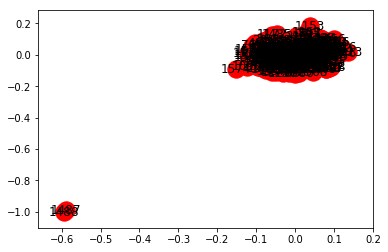

In [9]:
nx.draw_networkx(G)
plt.show()

In [10]:
G = G.to_undirected()
G

In [11]:
G = nx.convert_node_labels_to_integers(G, first_label=0)

In [12]:
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)
print('Average degre:', 2*M/N)

Number of nodes: 1574
Number of edges: 17215
Average degre: 21.874205844980942


In [13]:
r=nx.degree_assortativity_coefficient(G)
print("Assortativity = ","%3.4f"%r)

Assortativity =  -0.1133


In [14]:
knn = []
for i in G.nodes():
    aux =  nx.average_neighbor_degree(G, nodes = [i])
    knn.append(float(aux[i]))
knn = np.array(knn)
print("Average degree of the neighborhood of the network:", "%3.2f"%mean(knn))

Average degree of the neighborhood of the network: 120.12


In [15]:
vk = dict(G.degree())
vk = list(vk.values())
# vk

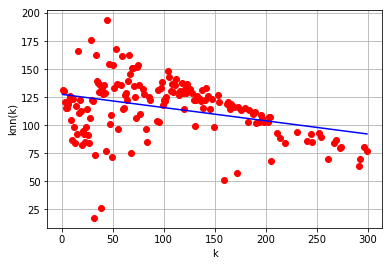

In [16]:
knnk = list()
ks = list()
for k in np.arange(np.min(vk), np.max(vk)):
    aux = vk == k
    if(len(knn[aux]) > 0):
        av_knn = mean(knn[aux]) #average clustering among all the nodes with degree k
        knnk.append(av_knn)
        ks.append(k)
plt.plot(ks, knnk, 'ro')

plt.ylabel("knn(k)")
plt.xlabel("k")
plt.grid(True)
plt.savefig('knnk.eps')

# determine best fit line
par = np.polyfit(ks, knnk, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
xl = [min(ks), max(ks)]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, '-b')
plt.savefig('knn.eps') #save the figure into a file
plt.show(True)

In [17]:
rho = corrcoef(ks, knnk)[0,1]
print('Pearson correlation coefficient:', rho)

Pearson correlation coefficient: -0.346013370558


In [18]:
from scipy import stats
s = stats.spearmanr(ks, knnk)
print('Spearman rank correlation coefficient:', s)

Spearman rank correlation coefficient: SpearmanrResult(correlation=-0.27327955599689846, pvalue=0.00039928444737241843)


# Community

In [19]:
from networkx.algorithms import community
np.random.seed(50)

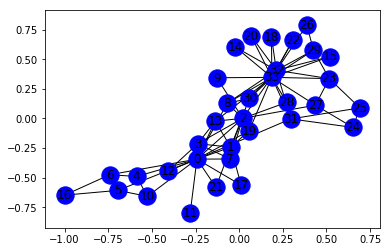

In [22]:
G= G=nx.read_edgelist("../data/zachary.txt", nodetype=int)
G = G.to_undirected()
G = nx.convert_node_labels_to_integers(G, first_label=0)
pos=nx.nx.fruchterman_reingold_layout(G)
nx.draw_networkx(G, pos=pos, node_color = 'b')
plt.show(True)

In [23]:
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

Number of nodes: 34
Number of edges: 78


In [24]:
#Girvan-Newman method (betweenness centrality)
communities = community.girvan_newman(G)
k = 2
for i in arange(0, k-1):
    next_level_communities = next(communities)
c = sorted(map(sorted, next_level_communities))
for cl in c:
    print('community:', cl)



community: [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]
community: [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


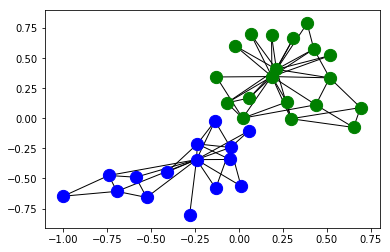

In [25]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0
for cm in c:
    nx.draw_networkx(G.subgraph(cm), pos=pos, node_color = colors[aux], 
                     with_labels = False, node_size=150)
    aux = aux + 1
plt.show(True)

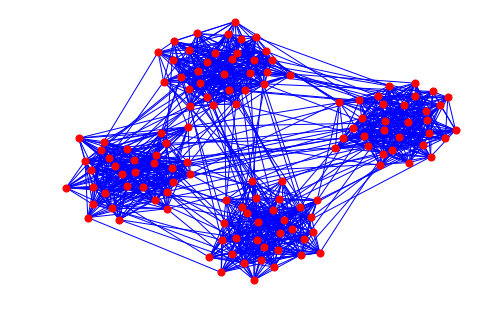

In [26]:
from networkx.algorithms.community import LFR_benchmark_graph
N = 128
tau1 = 3
tau2 = 1.5
mu = 0.04
k =16
minc = 32
maxc = 32
G = LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, 
                        max_degree = k, min_community=minc, max_community = maxc, seed = 10)
pos=nx.spring_layout(G)
nx.draw(G, with_labels = False, nodecolor='r', edge_color='b', 
        node_size=50, font_size=16,  width=1,pos = pos)
plt.show(True)

In [27]:
#Girvan-Newman method (betweenness centrality)
communities = community.girvan_newman(G)
k = 4
for i in arange(0, k-1):
    next_level_communities = next(communities)
c = sorted(map(sorted, next_level_communities))
for cl in c:
    print('community:', cl)



community: [0, 3, 26, 27, 28, 35, 38, 40, 43, 49, 50, 51, 55, 56, 70, 79, 80, 83, 84, 86, 87, 92, 95, 102, 103, 106, 117, 119, 120, 121, 122, 124]
community: [1, 6, 7, 10, 21, 22, 25, 31, 32, 37, 39, 44, 45, 46, 48, 52, 57, 60, 62, 64, 66, 73, 76, 85, 94, 101, 107, 110, 113, 115, 118, 123]
community: [2, 4, 12, 13, 14, 15, 16, 17, 18, 19, 20, 24, 29, 33, 36, 41, 42, 53, 59, 61, 63, 67, 69, 78, 82, 96, 99, 100, 108, 111, 112, 127]
community: [5, 8, 9, 11, 23, 30, 34, 47, 54, 58, 65, 68, 71, 72, 74, 75, 77, 81, 88, 89, 90, 91, 93, 97, 98, 104, 105, 109, 114, 116, 125, 126]


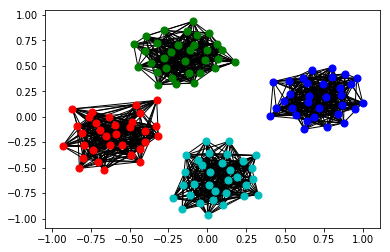

In [28]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0
for cm in c:
    nx.draw_networkx(G.subgraph(cm), pos=pos, node_color = colors[aux], with_labels = False, node_size=50)
    aux = aux + 1
plt.show(True)

# louvian method
Need to install `python-louvain` so that we can import community 

- e.g. `pip install python-louvain`

In [35]:
import community
from networkx.algorithms.community import LFR_benchmark_graph


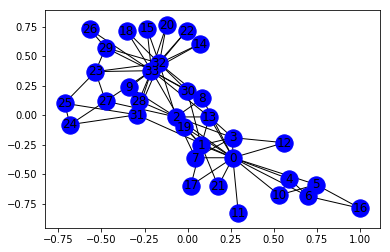

In [36]:
G= G=nx.read_edgelist("../data/zachary.txt", nodetype=int)
G = G.to_undirected()
G = nx.convert_node_labels_to_integers(G, first_label=0)
pos=nx.spring_layout(G)
nx.draw_networkx(G, pos=pos, node_color = 'b')
plt.show(True)

In [37]:
partition = community.best_partition(G)

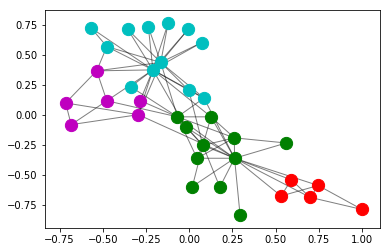

In [38]:
#drawing
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
size = float(len(set(partition.values())))
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 150, node_color = colors[int(count)])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

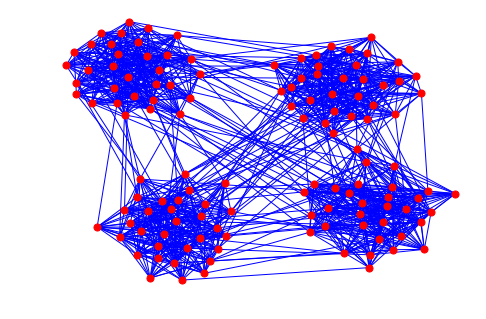

In [39]:
N = 128
tau1 = 3
tau2 = 1.5
mu = 0.04
k =16
minc = 32
maxc = 32
G = LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, 
                        max_degree = k, min_community=minc, max_community = maxc, seed = 10)
pos=nx.spring_layout(G)
nx.draw(G, with_labels = False, nodecolor='r', edge_color='b', 
        node_size=50, font_size=16,  width=1,pos = pos)
plt.show(True)

In [40]:
partition = community.best_partition(G)

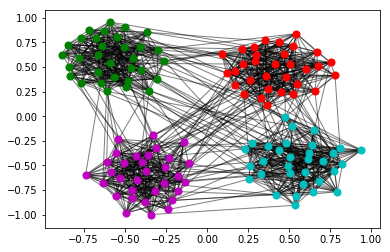

In [41]:
#drawing
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
size = float(len(set(partition.values())))
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 50, node_color = colors[int(count)])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()